#Unsupervised Machine Learning
There is no Target variable
Derive insights from the data directly using machine learning algorithms

# Principal Component Analysis
In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set.
It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with high dimensional data(more than 20 columns).

# What are principal components ?
A principal component is a normalized linear combination of the original predictors in a data set

Let’s say we have a set of predictors as X1, X2...,Xp
The First principal component can be written as: Z1 = Φ¹ * X1 + Φ² * X2 + Φ³ * X3 + .... +Φp¹ * Xp
First principal component is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component. No other component can have variability higher than first principal component.
The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line.
Similarly, we can compute the second, third, fourth principal component also.

DataSource:https://www.kaggle.com/datasets/informrohit1/smartphones-dataset 

# About Dataset:
This is Smartphones dataset which consists of  23 different columns .
The columns includes
Brand Name , model , price , rating processor_brand5battery_capacityfc et useful.

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [120]:
SmartphoneData = pd.read_csv('D:/ivy/datasets/smartphones_data.csv')
SmartphoneData.head()
SmartphoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   processor_brand            960 non-null    object 
 5   num_cores                  974 non-null    float64
 6   processor_speed            938 non-null    float64
 7   battery_capacity           969 non-null    float64
 8   fast_charging_available    980 non-null    int64  
 9   fast_charging              769 non-null    float64
 10  ram_capacity               980 non-null    int64  
 11  internal_memory            980 non-null    int64  
 12  screen_size                980 non-null    float64
 13  refresh_rate               980 non-null    int64  

In [121]:
# Keeping the target variable for future reference
TargetVariable=SmartphoneData['price']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=SmartphoneData.drop(['price', 'brand_name', 'model', 'processor_brand','os'], axis=1)

OnlyPredictors.head(20)


,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,89.0,8.0,3.20,5000.0,1,100.0,12,256,6.70,120,3,1.0,50.0,16.0,0,NaN,1440,3216
1,90.0,8.0,2.20,5000.0,1,33.0,6,128,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,91.0,8.0,2.40,5000.0,1,15.0,4,64,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
3,92.0,8.0,2.20,5000.0,1,NaN,6,128,6.55,120,3,1.0,50.0,16.0,1,1024.0,1080,2400
4,93.0,8.0,2.60,5000.0,1,67.0,6,128,6.70,120,3,1.0,108.0,16.0,0,NaN,1080,2412
5,94.0,8.0,2.20,5000.0,1,25.0,6,128,6.60,120,3,1.0,50.0,8.0,1,1024.0,1080,2408
6,95.0,6.0,3.22,3279.0,1,NaN,6,128,6.10,60,2,1.0,12.0,12.0,0,NaN,1170,2532
7,96.0,8.0,2.60,4980.0,1,120.0,8,256,6.67,120,3,1.0,200.0,16.0,0,NaN,1080,2400
8,97.0,8.0,2.50,4500.0,1,33.0,8,128,6.55,120,2,1.0,50.0,16.0,0,NaN,1080,2400
9,98.0,8.0,3.00,4500.0,1,80.0,8,128,6.43,90,3,1.0,50.0,32.0,0,NaN,1080,2400


In [83]:
OnlyPredictors.info()
OnlyPredictors.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rating                     879 non-null    float64
 1   has_5g                     980 non-null    bool   
 2   has_nfc                    980 non-null    bool   
 3   has_ir_blaster             980 non-null    bool   
 4   num_cores                  974 non-null    float64
 5   processor_speed            938 non-null    float64
 6   battery_capacity           969 non-null    float64
 7   fast_charging_available    980 non-null    int64  
 8   fast_charging              769 non-null    float64
 9   ram_capacity               980 non-null    float64
 10  internal_memory            980 non-null    float64
 11  screen_size                980 non-null    float64
 12  refresh_rate               980 non-null    int64  
 13  num_rear_cameras           980 non-null    int64  

rating                       30
has_5g                        2
has_nfc                       2
has_ir_blaster                2
num_cores                     3
processor_speed              35
battery_capacity             89
fast_charging_available       2
fast_charging                32
ram_capacity                  9
internal_memory               8
screen_size                  79
refresh_rate                  6
num_rear_cameras              4
num_front_cameras             2
primary_camera_rear          18
primary_camera_front         24
extended_memory_available     2
extended_upto                 7
resolution_width             40
resolution_height            65
dtype: int64

In [122]:
OnlyPredictors.isnull().sum()

rating                       101
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [123]:
OnlyPredictors=OnlyPredictors.drop(['extended_upto'], axis=1)

In [125]:
OnlyPredictors['fast_charging']=OnlyPredictors['fast_charging'].fillna(value=OnlyPredictors['fast_charging'].mean())
OnlyPredictors['rating']=OnlyPredictors['rating'].fillna(value=OnlyPredictors['rating'].mode()[0])
OnlyPredictors['processor_speed']=OnlyPredictors['processor_speed'].fillna(value=OnlyPredictors['processor_speed'].mean())
OnlyPredictors['battery_capacity']=OnlyPredictors['battery_capacity'].fillna(value=OnlyPredictors['battery_capacity'].mean())
OnlyPredictors['num_cores']=OnlyPredictors['num_cores'].fillna(value=OnlyPredictors['num_cores'].mode()[0])
OnlyPredictors['num_front_cameras']=OnlyPredictors['num_front_cameras'].fillna(value=OnlyPredictors['num_front_cameras'].mode()[0])
OnlyPredictors['primary_camera_front']=OnlyPredictors['primary_camera_front'].fillna(value=OnlyPredictors['primary_camera_front'].mean())

In [126]:
OnlyPredictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rating                     980 non-null    float64
 1   num_cores                  980 non-null    float64
 2   processor_speed            980 non-null    float64
 3   battery_capacity           980 non-null    float64
 4   fast_charging_available    980 non-null    int64  
 5   fast_charging              980 non-null    float64
 6   ram_capacity               980 non-null    int64  
 7   internal_memory            980 non-null    int64  
 8   screen_size                980 non-null    float64
 9   refresh_rate               980 non-null    int64  
 10  num_rear_cameras           980 non-null    int64  
 11  num_front_cameras          980 non-null    float64
 12  primary_camera_rear        980 non-null    float64
 13  primary_camera_front       980 non-null    float64

In [128]:
OnlyPredictors['processor_speed']= OnlyPredictors['processor_speed'].astype(int)
OnlyPredictors['rating']= OnlyPredictors['rating'].astype(int)

In [133]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
print(X[0:10])
print(y[0:10])

[[8.90000000e+01 8.00000000e+00 3.00000000e+00 5.00000000e+03
  1.00000000e+00 1.00000000e+02 1.20000000e+01 2.56000000e+02
  6.70000000e+00 1.20000000e+02 3.00000000e+00 1.00000000e+00
  5.00000000e+01 1.60000000e+01 0.00000000e+00 1.44000000e+03
  3.21600000e+03]
 [9.00000000e+01 8.00000000e+00 2.00000000e+00 5.00000000e+03
  1.00000000e+00 3.30000000e+01 6.00000000e+00 1.28000000e+02
  6.59000000e+00 1.20000000e+02 3.00000000e+00 1.00000000e+00
  6.40000000e+01 1.60000000e+01 1.00000000e+00 1.08000000e+03
  2.41200000e+03]
 [9.10000000e+01 8.00000000e+00 2.00000000e+00 5.00000000e+03
  1.00000000e+00 1.50000000e+01 4.00000000e+00 6.40000000e+01
  6.60000000e+00 9.00000000e+01 3.00000000e+00 1.00000000e+00
  5.00000000e+01 1.30000000e+01 1.00000000e+00 1.08000000e+03
  2.40800000e+03]
 [9.20000000e+01 8.00000000e+00 2.00000000e+00 5.00000000e+03
  1.00000000e+00 4.61261378e+01 6.00000000e+00 1.28000000e+02
  6.55000000e+00 1.20000000e+02 3.00000000e+00 1.00000000e+00
  5.00000000e+01

In [134]:
X.shape

(980, 17)

# Applying PCA

In [154]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=X.shape[1])

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#17 Columns present in X are now represented by 17 Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[ 2.04960e+02  1.05757e+03  1.50620e+02  4.09000e+00 -7.20000e-01
   4.61300e+01 -1.13700e+01 -8.61000e+00  3.27000e+00 -1.75000e+00
   2.70000e-01  1.80000e-01 -6.00000e-02  1.30000e-01  1.10000e-01
   2.00000e-02 -3.00000e-02]
 [ 1.87290e+02  1.88270e+02 -3.70000e+01 -2.77300e+01  8.38000e+00
  -1.21000e+01  2.52800e+01 -1.30000e+00  8.58000e+00  1.59000e+00
  -4.70000e-01  2.60000e-01  3.10000e-01  1.60000e-01 -5.00000e-02
   5.00000e-02 -0.00000e+00]
 [ 1.87040e+02  1.76810e+02 -4.21500e+01 -9.31800e+01 -2.13300e+01
  -1.50100e+01  1.13700e+01 -1.40000e-01  1.26300e+01  2.46000e+00
  -7.30000e-01  4.00000e-01  1.00000e-02  5.00000e-02 -1.80000e-01
   7.00000e-02 -1.00000e-02]
 [ 1.86880e+02  1.76460e+02 -3.44500e+01 -2.60000e+01  7.88000e+00
   6.77000e+00  2.31200e+01 -7.00000e-02  1.07700e+01  1.87000e+00
  -7.30000e-01  2.30000e-01  4.20000e-01  1.80000e-01 -5.00000e-02
  -2.00000e-02 -0.00000e+00]
 [ 1.87480e+02  1.89940e+02 -3.59700e+01 -2.59000e+01  5.70600e+01
  -2.13100e+0

In [155]:
reduced_X.shape

(980, 17)

In [156]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 73% and 20% variance of data respectively

[0.73 0.2  0.06 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


In [157]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 73.43  93.64  99.19  99.82  99.91  99.96  99.99 100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


# Finding optimal number of Principal components

Text(0, 0.5, '% Variance explained')

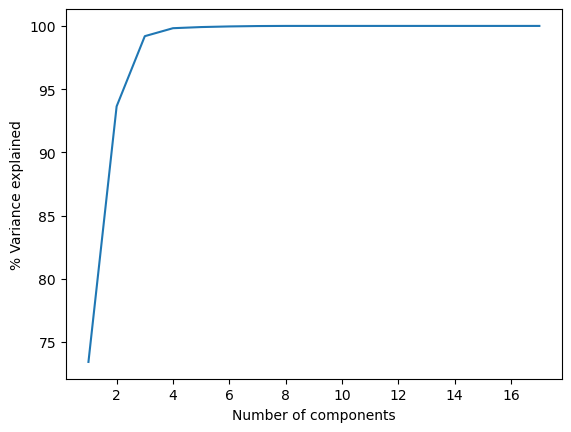

In [158]:
# By Looking at below graph we can see that 4 components are explaining maximum Variance in the dataset
# The elbow occurs at 4rd principal component
plt.plot( range(1,18), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

### Creating final number of Principal Components

In [159]:
# Choosing 4-principal components based on above graph
pca = PCA(n_components=4)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# 17 Columns present in X are now represented by 4-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[  204.96  1057.57   150.62     4.09]
 [  187.29   188.27   -37.     -27.73]
 [  187.04   176.81   -42.15   -93.18]
 [  186.88   176.46   -34.45   -26.  ]
 [  187.48   189.94   -35.97   -25.9 ]
 [  187.13   183.86   -36.44   -27.83]
 [-1531.16   360.97     3.03   -49.7 ]
 [  167.65   194.09   -21.27   104.38]
 [ -312.91   187.96   -40.45   -27.12]
 [ -313.09   188.03   -40.25   -25.86]]


In [160]:
ReducedData=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4'])
ReducedData['price']=y
ReducedData.head()

,PC1,PC2,PC3,PC4,price
0,204.959226,1057.570612,150.624878,4.085516,54999
1,187.292742,188.267246,-36.997227,-27.726330,19989
2,187.041234,176.814216,-42.145363,-93.184162,16499
3,186.883796,176.464520,-34.453039,-26.000617,14999
4,187.477315,189.941901,-35.969648,-25.899957,24999


# Now any machine learning classification algorithm can be used on above data

In [161]:
# Correlation bw any two PC will be zero
ReducedData.corr()

,PC1,PC2,PC3,PC4,price
PC1,1.000000e+00,-5.049027e-17,-3.026816e-17,-1.064023e-17,-0.153464
PC2,-5.049027e-17,1.000000e+00,-6.144960e-17,-1.955738e-16,0.394451
PC3,-3.026816e-17,-6.144960e-17,1.000000e+00,5.122868e-15,0.217034
PC4,-1.064023e-17,-1.955738e-16,5.122868e-15,1.000000e+00,0.381264
price,-1.534636e-01,3.944512e-01,2.170342e-01,3.812644e-01,1.000000


Inverse transform
We can get the original data from the principal components using inverse transform



In [149]:
OriginalData=pca_fit.inverse_transform(reduced_X)

In [151]:
# Printing sample rows
OriginalData[0:5]

array([[8.83866615e+01, 8.26863222e+00, 2.66789472e+00, 4.99975237e+03,
        1.26119559e+00, 6.42328087e+01, 1.02494320e+01, 2.57809539e+02,
        6.82786598e+00, 1.24048627e+02, 3.66517595e+00, 1.06242068e+00,
        8.04799305e+01, 2.66153426e+01, 2.40143064e-01, 1.43960017e+03,
        3.21548443e+03],
       [8.00479053e+01, 7.90839379e+00, 2.17640252e+00, 5.00012426e+03,
        9.21693217e-01, 4.67383432e+01, 6.86818336e+00, 1.28554244e+02,
        6.57650330e+00, 9.60841038e+01, 2.95971502e+00, 1.02464544e+00,
        5.57139335e+01, 1.79654977e+01, 6.21646542e-01, 1.08041648e+03,
        2.41259210e+03],
       [7.92807242e+01, 7.96256236e+00, 2.10547790e+00, 5.00002063e+03,
        9.15065033e-01, 4.28142002e+01, 6.19559893e+00, 6.23160313e+01,
        6.54954588e+00, 9.24789739e+01, 2.96576527e+00, 1.01067517e+00,
        5.55263031e+01, 1.75158038e+01, 7.07378438e-01, 1.07966362e+03,
        2.40762244e+03],
       [7.99828279e+01, 7.90220601e+00, 2.17285027e+00, 5.000

In [152]:
# Comparing the above array with the original data
OnlyPredictors.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,89,8.0,3,5000.0,1,100.000000,12,256,6.70,120,3,1.0,50.0,16.0,0,1440,3216
1,90,8.0,2,5000.0,1,33.000000,6,128,6.59,120,3,1.0,64.0,16.0,1,1080,2412
2,91,8.0,2,5000.0,1,15.000000,4,64,6.60,90,3,1.0,50.0,13.0,1,1080,2408
3,92,8.0,2,5000.0,1,46.126138,6,128,6.55,120,3,1.0,50.0,16.0,1,1080,2400
4,93,8.0,2,5000.0,1,67.000000,6,128,6.70,120,3,1.0,108.0,16.0,0,1080,2412
